# Loading in Data with Tensorflow and Keras



In [5]:
breeds = [ "beagle", "bernese_mountain_dog", "doberman", "labrador_retriever", "siberian_husky"]


In [18]:
import tensorflow as tf
from tensorflow import keras


In [6]:
# Create Dictionary

args = {
    "labels": "inferred",
    "label_mode": "categorical", #each breed is one category
    "batch_size": 32,  # 32 images are loaded and process at once
    "image_size": (256, 256), # to resize all images to same size
    "seed": 1,  # to ensure that the same sequence of random numbers is generated every time the model is trained / tested
    "validation_split": .2,  # 20% of the data to be used to validate algorithm
    "class_names": breeds 
}

In [7]:
# Setup Validation Dataset
train = tf.keras.utils.image_dataset_from_directory(
    "images",
    subset="training",
    **args
)

Found 926 files belonging to 5 classes.
Using 741 files for training.


In [8]:
# Setup Test Dataset
test = tf.keras.utils.image_dataset_from_directory(
    "images",
    subset="validation",
    **args
)

Found 926 files belonging to 5 classes.
Using 185 files for validation.


In [9]:
train
# BatachDataset indicates that train data has been loaded into the tensorflow

<_BatchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 5), dtype=tf.float32, name=None))>

# Exploring Images in Dataset

In [10]:
# To get the first batch (1 batch is 32 images)
first = train.take(1)
first

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 5), dtype=tf.float32, name=None))>

In [ ]:
# To look at images and labels in first batch
images , labels = list(first)[0]

In [14]:
first_image = images[0]

# Showing the first image [red, green, blue]
# TF seperated 3 main colours into 3 matrixes
first_image[:3,:3,0]

<tf.Tensor: shape=(3, 3), dtype=float32, numpy=
array([[28.836777, 34.30638 , 35.53241 ],
       [17.165146, 20.022522, 21.235245],
       [23.966217, 18.18164 , 15.216293]], dtype=float32)>

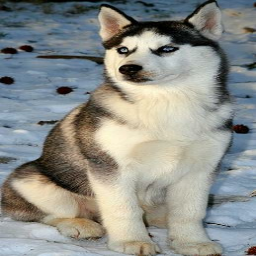

In [15]:
from PIL import Image

Image.fromarray(first_image.numpy().astype("uint8"))

In [16]:
labels[0]

#  numpy=array([0., 0., 0., 0., 1.], 1 located at last place indicates that this image is a husky

<tf.Tensor: shape=(5,), dtype=float32, numpy=array([0., 0., 0., 0., 1.], dtype=float32)>

# Training an Initial Convolutional Layer

In [17]:
# To load everything from memory instead of the hard drive
# For performance optimisation

train = train.cache().prefetch(buffer_size= tf.data.AUTOTUNE)
test = test.cache().prefetch(buffer_size= tf.data.AUTOTUNE)

In [20]:
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

model = Sequential([
  tf.keras.layers.Rescaling(1./255),  # Rescale data to a form for neural network easier to work with
  layers.Conv2D(16, 3, padding='same', activation='relu', input_shape=(256,256,3)), # Run convolutional network to scan over images
  layers.Flatten(), # Bring features that nn has created for us to prediction
  layers.Dense(128, activation='relu'), # To convert it to prediction layer
  layers.Dense(len(breeds)) # Layer to make the prediction
])


In [21]:
model.compile(
    optimizer="adam", 
    loss = tf.keras.losses.CategoricalCrossentropy(from_logits = True),  #defines the loss function for a categorical classification model using cross-entropy with logits.
    metrics= ["accuracy"]
)

In [22]:
history = model.fit(
    train,
    validation_data = test,
    epochs = 5,
    verbose = 1
)

Epoch 1/5
24/24 [==============================] - 36s 1s/step - loss: 45.6629 - accuracy: 0.2078 - val_loss: 8.3866 - val_accuracy: 0.2216
Epoch 2/5
24/24 [==============================] - 27s 1s/step - loss: 3.3412 - accuracy: 0.3752 - val_loss: 2.8841 - val_accuracy: 0.2919
Epoch 3/5
24/24 [==============================] - 27s 1s/step - loss: 1.0552 - accuracy: 0.6397 - val_loss: 2.0969 - val_accuracy: 0.3405
Epoch 4/5
24/24 [==============================] - 28s 1s/step - loss: 0.4889 - accuracy: 0.8381 - val_loss: 2.0421 - val_accuracy: 0.3405
Epoch 5/5
24/24 [==============================] - 28s 1s/step - loss: 0.2341 - accuracy: 0.9514 - val_loss: 3.6610 - val_accuracy: 0.3351


# Looking at Model Error
